## Depression Detection using NTK
To run the following code, ensure you have installed the packages mentioned in the README.MD

In [10]:
pip install scikit-ntk

Note: you may need to restart the kernel to use updated packages.


Import all the python libraries required for the classification task.

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from skntk import NeuralTangentKernel as NTK
from sklearn.svm import SVC

This Python script demonstrates how to use a Neural Tangent Kernel (NTK) with Support Vector Classification (SVC) on a text dataset. It involves loading and preprocessing text data, transforming it using TF-IDF, training an SVM with the Neural Tangent kernel (NTK), and evaluating its performance using various metrics. Finally, it visualizes the results with a confusion matrix and t-SNE plot.

Accuracy: 0.9586296056884293
Confusion Matrix:
[[771  12]
 [ 52 712]]
Precision: 0.9598347482729354
Recall: 0.9586296056884293
F1 Score: 0.958588749938078
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       783
           1       0.98      0.93      0.96       764

    accuracy                           0.96      1547
   macro avg       0.96      0.96      0.96      1547
weighted avg       0.96      0.96      0.96      1547



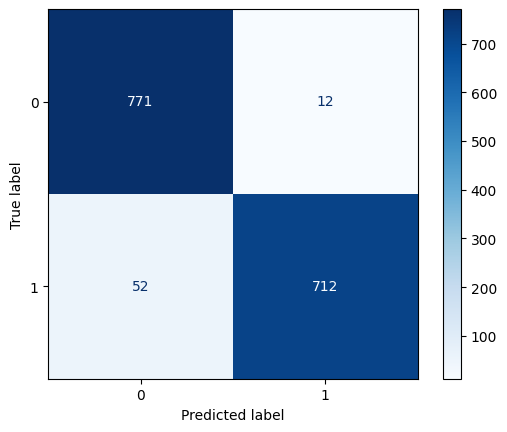

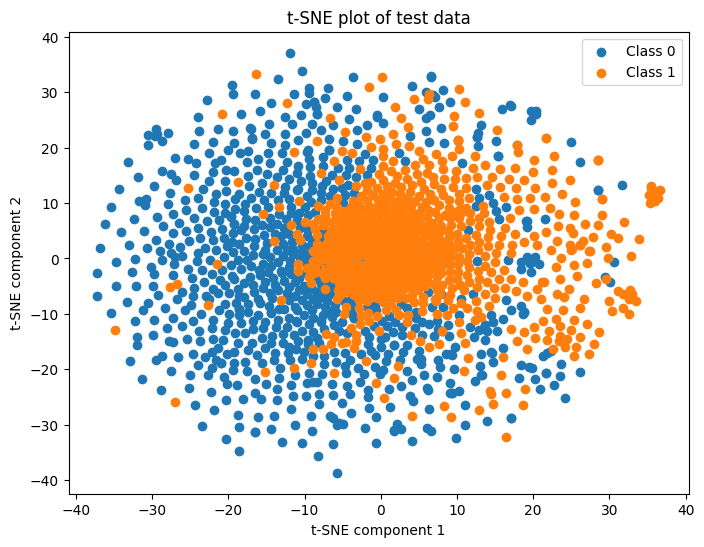

In [12]:
# Load the dataset
df = pd.read_csv('/depression_dataset_reddit_cleaned.csv')

# Preprocess the dataset (remove NaNs if any)
df = df.dropna()

# Extract features and labels
X = df['clean_text']
y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()  # Convert to dense format
X_test_tfidf = vectorizer.transform(X_test).toarray()  # Convert to dense format

# Initialize the Neural Tangent Kernel
kernel_ntk = NTK(depth=1)

# Define a custom kernel function to handle dense arrays
def ntk_kernel(X, Y=None):
    if Y is None:
        Y = X
    return kernel_ntk(X, Y)

# Train the SVM model with NTK kernel
SVCClf = SVC(kernel=ntk_kernel)
SVCClf.fit(X_train_tfidf, y_train)

# Predict the labels on the test set
y_pred = SVCClf.predict(X_test_tfidf)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print precision, recall, F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVCClf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Perform t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_tfidf)

# Plot t-SNE
plt.figure(figsize=(8, 6))
for i in range(len(set(y_test))):
    plt.scatter(X_test_tsne[y_test == i, 0], X_test_tsne[y_test == i, 1], label=f"Class {i}")
plt.legend()
plt.title("t-SNE plot of test data")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()


The hyperparameter 'depth' is set to 2.

Accuracy: 0.9553975436328378
Confusion Matrix:
[[772  11]
 [ 58 706]]
Precision: 0.9570544779426577
Recall: 0.9553975436328378
F1 Score: 0.9553396259544996
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       783
           1       0.98      0.92      0.95       764

    accuracy                           0.96      1547
   macro avg       0.96      0.96      0.96      1547
weighted avg       0.96      0.96      0.96      1547



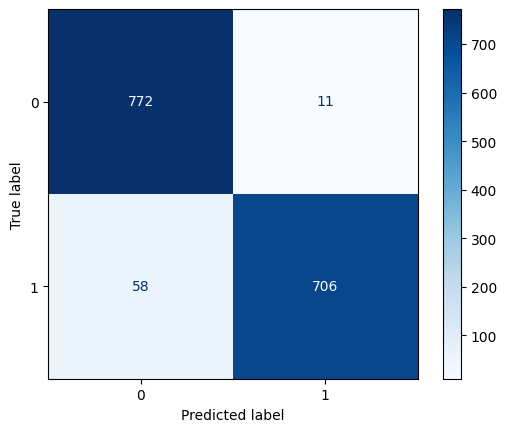

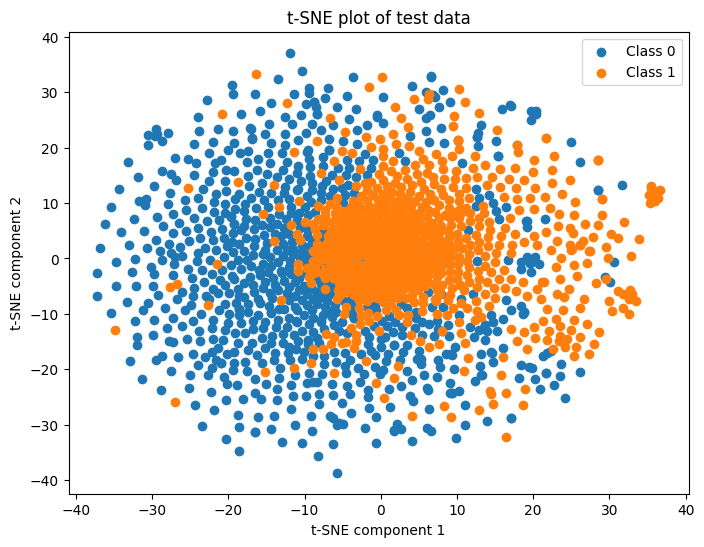

In [13]:
# Load the dataset
df = pd.read_csv('/depression_dataset_reddit_cleaned.csv')

# Preprocess the dataset (remove NaNs if any)
df = df.dropna()

# Extract features and labels
X = df['clean_text']
y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()  # Convert to dense format
X_test_tfidf = vectorizer.transform(X_test).toarray()  # Convert to dense format

# Initialize the Neural Tangent Kernel
kernel_ntk = NTK(depth=2)

# Define a custom kernel function to handle dense arrays
def ntk_kernel(X, Y=None):
    if Y is None:
        Y = X
    return kernel_ntk(X, Y)

# Train the SVM model with NTK kernel
SVCClf = SVC(kernel=ntk_kernel)
SVCClf.fit(X_train_tfidf, y_train)

# Predict the labels on the test set
y_pred = SVCClf.predict(X_test_tfidf)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print precision, recall, F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVCClf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Perform t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_tfidf)

# Plot t-SNE
plt.figure(figsize=(8, 6))
for i in range(len(set(y_test))):
    plt.scatter(X_test_tsne[y_test == i, 0], X_test_tsne[y_test == i, 1], label=f"Class {i}")
plt.legend()
plt.title("t-SNE plot of test data")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()


The hyperparameter 'depth' is set to 3.

Accuracy: 0.9553975436328378
Confusion Matrix:
[[774   9]
 [ 60 704]]
Precision: 0.9573531389673064
Recall: 0.9553975436328378
F1 Score: 0.9553308727082502
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       783
           1       0.99      0.92      0.95       764

    accuracy                           0.96      1547
   macro avg       0.96      0.95      0.96      1547
weighted avg       0.96      0.96      0.96      1547



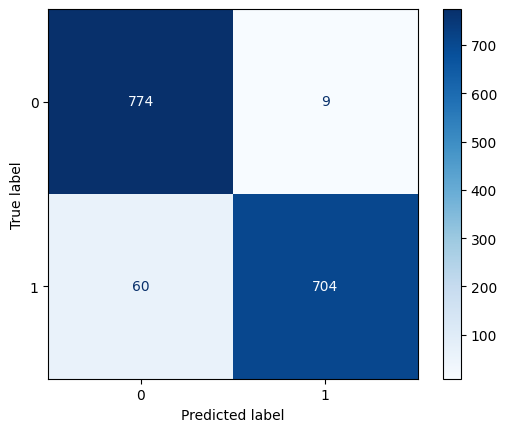

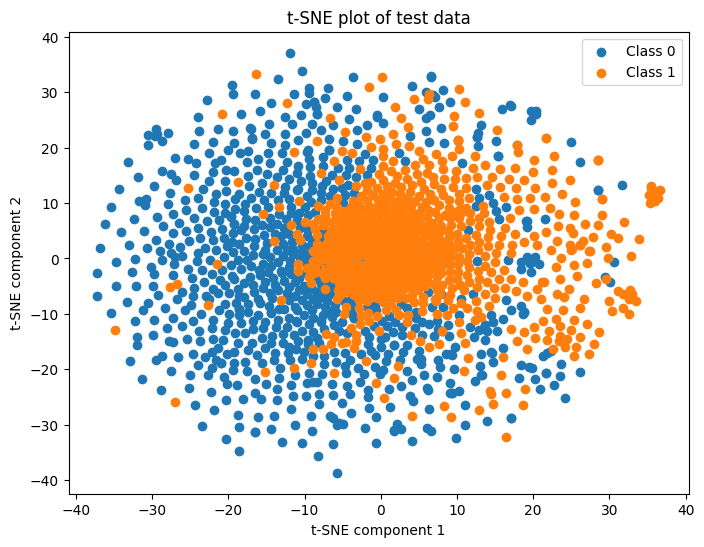

In [14]:
# Load the dataset
df = pd.read_csv('/depression_dataset_reddit_cleaned.csv')

# Preprocess the dataset (remove NaNs if any)
df = df.dropna()

# Extract features and labels
X = df['clean_text']
y = df['is_depression']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()  # Convert to dense format
X_test_tfidf = vectorizer.transform(X_test).toarray()  # Convert to dense format

# Initialize the Neural Tangent Kernel
kernel_ntk = NTK(depth=3)

# Define a custom kernel function to handle dense arrays
def ntk_kernel(X, Y=None):
    if Y is None:
        Y = X
    return kernel_ntk(X, Y)

# Train the SVM model with NTK kernel
SVCClf = SVC(kernel=ntk_kernel)
SVCClf.fit(X_train_tfidf, y_train)

# Predict the labels on the test set
y_pred = SVCClf.predict(X_test_tfidf)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print precision, recall, F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVCClf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Perform t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_tfidf)

# Plot t-SNE
plt.figure(figsize=(8, 6))
for i in range(len(set(y_test))):
    plt.scatter(X_test_tsne[y_test == i, 0], X_test_tsne[y_test == i, 1], label=f"Class {i}")
plt.legend()
plt.title("t-SNE plot of test data")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()


There's no significant change in the performance metrics with depth values varying from 1 to 3.